<a href="https://colab.research.google.com/github/sergionl/trabajoIA/blob/main/Codigo_fuente/C%C3%B3digo_a_star.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

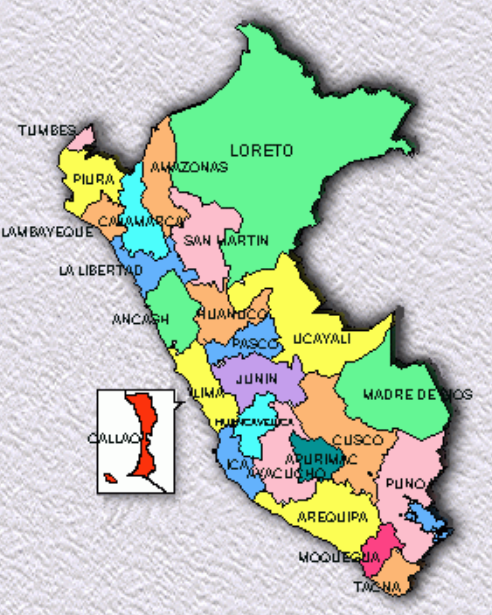

### Importamos los módulos correspondientes

In [2]:
import graphviz as gv   #Grafos
import numpy as np      #Numéros y matrices
import pandas as pd     #DataFrame

### Datos iniciales

In [3]:
ciudades = {
  0 : "Lima",
  1 : "Arequipa",
  2 : "Cuzco",
  3 : "Chiclayo",
  4 : "Trujillo",
  5 : "Juliaca",
  6 : "Iquitos",
  7 : "Madre de Dios"
}

In [4]:
rutas = [
  #o  d   t  -->  donde o(origen), d(destino), t(tiempo en minutos)  
  [0, 1,  96],
  [0, 2,  75],
  [0, 3,  80],
  [0, 5,  90],
  [0, 6, 105],
  [1, 2, 225], 
  [3, 4, 200],
  [6, 7, 280]
]
print(rutas)

[[0, 1, 96], [0, 2, 75], [0, 3, 80], [0, 5, 90], [0, 6, 105], [1, 2, 225], [3, 4, 200], [6, 7, 280]]


Fuente https://www.latamairlines.com/pe/es

### Creamos el grafo y visualizamos el grafo

In [5]:
grafo = dict()

for i in ciudades:
  grafo[i] = list()

#ida y vuelta
for u, v, w in rutas:
  grafo[u].append((v, w))   #ida
  grafo[v].append((u, w))   #vuelta

for i, j in grafo.items():
  print(i, ":", j)

0 : [(1, 96), (2, 75), (3, 80), (5, 90), (6, 105)]
1 : [(0, 96), (2, 225)]
2 : [(0, 75), (1, 225)]
3 : [(0, 80), (4, 200)]
4 : [(3, 200)]
5 : [(0, 90)]
6 : [(0, 105), (7, 280)]
7 : [(6, 280)]


In [6]:
def convertMinutes2Hours(min):
  return str(min//60) + ":" + str(min % 60)

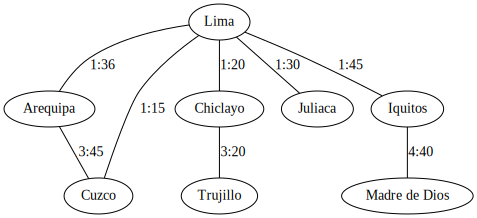

In [7]:
G = gv.Graph()

for u, v, w in rutas:
  G.edge(ciudades[u], ciudades[v], label=convertMinutes2Hours(w))
 
G   #Imprimir

### Sin embargo, para usar A*, tenemos que usar una heuristica.

Para nuestro caso, usamos las distancias en km. Fuente https://es.distance.to/

In [8]:
heuristica = [
  [0, 762.64, 573.18, 666.37, 490.91, 836.71, 1017.34, 739.15],
  [762.64, 0, 323.18, 1400.86, 1226.88, 180.75, 1419.07, 508.36],
  [573.18, 323.18, 0, 1142.49, 975.60, 294.88, 1095.91, 251.69],
  [666.37, 1400.86, 1142.49, 0, 176.05, 1435.16, 802.98, 1201.75],
  [490.91, 1226.88, 975.60, 176.05, 0, 1266.36,  801.38, 1051.48],
  [836.71, 180.75, 294.88, 1435.16, 1266.36, 0, 1349.64, 388.46],
  [1017.34, 1419.07, 1095.91, 802.98, 901.38, 1349.64, 0, 975.19],
  [739.15, 508.36, 251.69, 1201.75, 1051.48, 388.46, 975.19, 0] 
]

H = pd.DataFrame(heuristica, columns=range(0, 8))
H

,0,1,2,3,4,5,6,7
0,0.00,762.64,573.18,666.37,490.91,836.71,1017.34,739.15
1,762.64,0.00,323.18,1400.86,1226.88,180.75,1419.07,508.36
2,573.18,323.18,0.00,1142.49,975.60,294.88,1095.91,251.69
3,666.37,1400.86,1142.49,0.00,176.05,1435.16,802.98,1201.75
4,490.91,1226.88,975.60,176.05,0.00,1266.36,801.38,1051.48
5,836.71,180.75,294.88,1435.16,1266.36,0.00,1349.64,388.46
6,1017.34,1419.07,1095.91,802.98,901.38,1349.64,0.00,975.19
7,739.15,508.36,251.69,1201.75,1051.48,388.46,975.19,0.00


# Algorítmo A*

In [25]:
def aStar(grafo, source, target):
  open_ls = []                 # lista abierta con elementos tupla (F, nodo)
  closed_ls = []               # lista cerrada
  
  parent = [-1] * len(grafo)   # Reconstruir
  
  G = [np.inf] * len(grafo)    # G(n) distancia recorrida del inicio al nodo 'n'
  F = [np.inf] * len(grafo)    # H(n) distancia del nodo 'n' hasta el final
                               # Luego, F(n) = G(n) + H(n)

  # Nodo inicial
  parent[source] = -1

  G[source] = 0
  F[source] = G[source] + H.loc[source, target]

  tupla = (F[source], source)
  open_ls.append(tupla)

  while len(open_ls):
    
    #Sacar de lista abierta y poner en lista cerrada
    open_ls = sorted(open_ls)   # Para sacar el menor
    _, nodo = open_ls.pop()
    closed_ls.append((_, nodo))
    
    if nodo == target:    # ¿Se encontró el destino?  
      break   

    if nodo in closed_ls:  # ¿Esta en lista cerrada? 
      continue

      
    for v, w in grafo[nodo]:
      if v in closed_ls:  # ¿Esta en lista cerrada? 
        continue

      Gaux = G[nodo] + w 
      Faux = Gaux + H.loc[v, target]

      if Gaux < G[v]:
        G[v] = Gaux
        F[v] = Faux
        
        tupla = (F[v], v)
        open_ls.append(tupla)
        parent[v] = nodo

  camino = []
  
  while nodo != -1:
    camino.append(nodo)
    nodo = parent[nodo]

  return camino

In [26]:
def Resultado(camino):

  distanciaT = 0
  tiempoT = 0
  resultado = []

  for i in range(len(camino) - 1):

    origen = camino[i]
    destino = camino[i+1]

    distancia = H.loc[origen, destino]

    tiempo = 0
    for v, w in grafo[origen]:
      if v == destino:
        tiempo = w
        break

    distanciaT += distancia
    tiempoT += tiempo
    
    viaje = [ciudades[origen], ciudades[destino], distancia, convertMinutes2Hours(tiempo)]
    resultado.append(viaje)

  tiempoT = convertMinutes2Hours(tiempoT)
  resultado.append(["TOTAL", "-", distanciaT, tiempoT])
  return pd.DataFrame(data = resultado, columns = ['Desde', 'Hacia', 'Distancia (Km.)', 'Tiempo (H.)'])


# Ejecutar aStar y mostrar los resultados


#Imputs del usuario
se debe correr ambos bloques de codigo

In [27]:
#@title Ciudades 
#@markdown Ingrese la ciudad donde se encuentra

no_type_checking = ''
ciudad_inicial = 'CHICLAYO' #@param {type:"string"}

#@markdown Ingrese la ciudad a donde se dirige

ciudad_destino = 'AREQUIPA' #@param {type:"string"}



In [28]:
ciudad_inicial = ciudad_inicial.lower()
ciudad_destino = ciudad_destino.lower()
if ciudad_inicial == 'lima':
  inicio = 0
elif ciudad_inicial == 'arequipa':
  inicio = 1
elif ciudad_inicial == 'cuzco':
  inicio = 2
elif ciudad_inicial == 'chiclayo':
  inicio = 3
elif ciudad_inicial == 'trujillo':
  inicio = 4
elif ciudad_inicial == 'juliaca':
  inicio = 5
elif ciudad_inicial == 'iquitos':
  inicio = 6
elif ciudad_inicial == 'madre de dios':
  inicio = 7
else:
  print("ciudad no disponible de inicio no disponible")

if ciudad_destino == 'lima':
  fin = 0
elif ciudad_destino == 'arequipa':
  fin = 1
elif ciudad_destino == 'cuzco':
  fin = 2
elif ciudad_destino == 'chiclayo':
  fin = 3
elif ciudad_destino == 'trujillo':
  fin = 4
elif ciudad_destino == 'juliaca':
  fin = 5
elif ciudad_destino == 'iquitos':
  fin = 6
elif ciudad_destino == 'madre de dios':
  fin = 7
else:
  print("ciudad no disponible de llegada no disponible")


###usando ciudades seleccionadas por el usuario

De Chiclayo a Arequipa

In [29]:
camino = aStar(grafo, inicio, fin)
camino = list(reversed(camino))
print(camino)
Resultado(camino)

[3, 0, 1]


,Desde,Hacia,Distancia (Km.),Tiempo (H.)
0,Chiclayo,Lima,666.37,1:20
1,Lima,Arequipa,762.64,1:36
2,TOTAL,-,1429.01,2:56


###Ejemplo

Viaje de Trujillo a Madre de Dios

In [30]:
camino = aStar(grafo, 4, 7)
camino = list(reversed(camino))
print(camino)
Resultado(camino)

[4, 3, 0, 6, 7]


,Desde,Hacia,Distancia (Km.),Tiempo (H.)
0,Trujillo,Chiclayo,176.05,3:20
1,Chiclayo,Lima,666.37,1:20
2,Lima,Iquitos,1017.34,1:45
3,Iquitos,Madre de Dios,975.19,4:40
4,TOTAL,-,2834.95,11:5


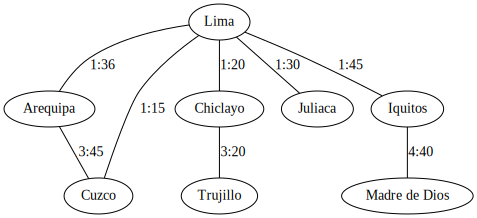

In [20]:
G